<a href="https://colab.research.google.com/github/Donthulavaishnavi/LGMVIP-DataScience/blob/main/Prediction_using_decision_tree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

# **Loading the Dataset**

In [ ]:
vd=pd.read_excel('/content/drive/MyDrive/Datasets /Iris.csv')

In [ ]:
vd

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
vd.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
vd.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# **Getting the size of the dataset**

In [ ]:
print("Number of rows in the dataset :",vd.shape[0])
print("Number of columns in the dataset :",vd.shape[1])

Number of rows in the dataset : 150
Number of columns in the dataset : 6


In [ ]:
columns = vd.columns.tolist()
print("List of columns :",columns)

List of columns : ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


# **Extracting useful Information**

In [ ]:
vd=vd[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
vd.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Checking for null values**

In [ ]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
vd.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Describing the Statistical Measures**

In [ ]:
vd.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# **Visualising the Data**

**Checking for count of species in the Dataset**

In [ ]:
species_count=vd['Species'].value_counts()
labels = species_count.index.tolist()
count = species_count.values.tolist()
species_count.to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


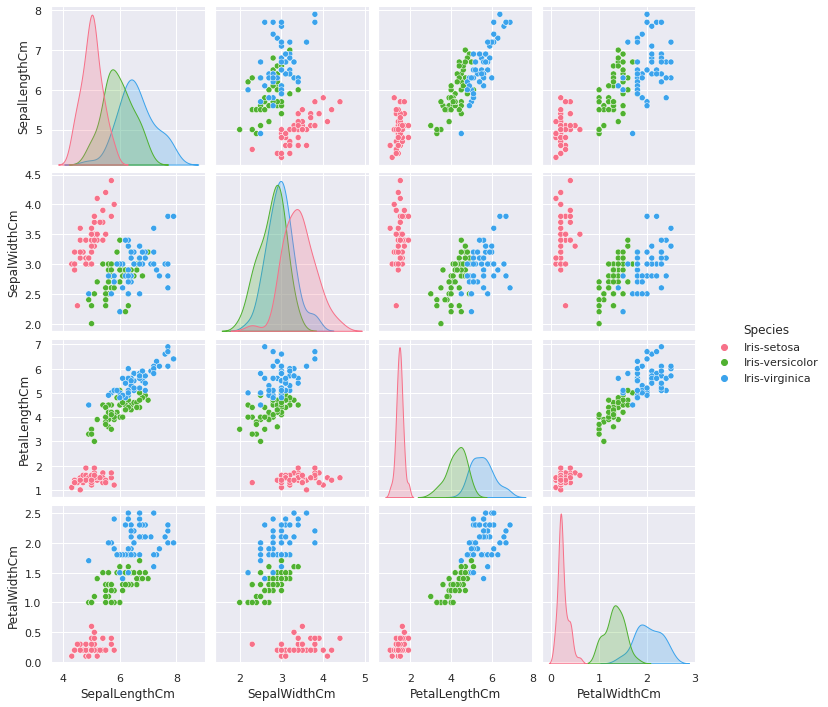

In [ ]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.pairplot(vd, hue='Species',palette="husl")

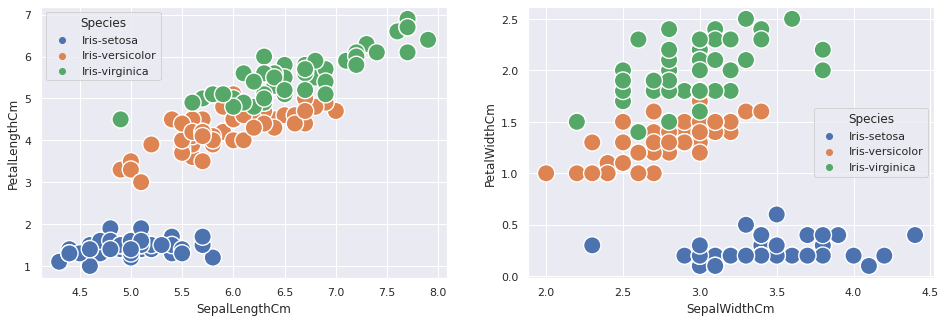

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=vd,hue='Species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=vd,hue='Species',ax=ax2,s=300,marker='o')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


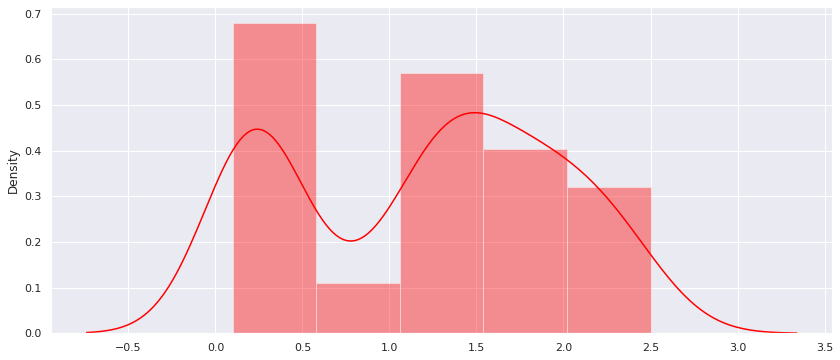

In [ ]:
sns.distplot(x=vd["PetalWidthCm"], kde=True, color='red');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


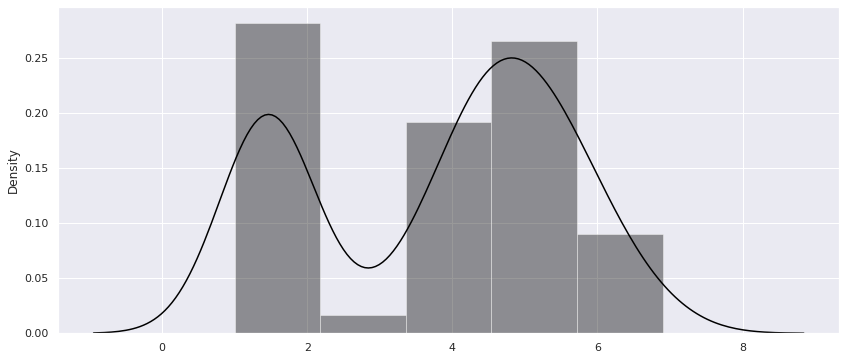

In [ ]:
sns.distplot(x=vd["PetalLengthCm"], kde=True, color='black');

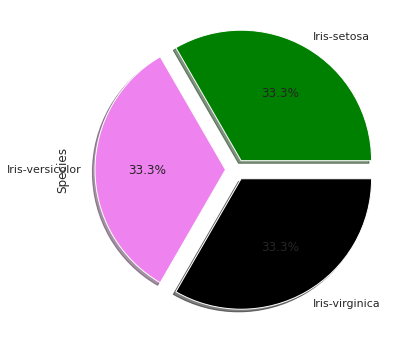

In [ ]:
# Pie plot to show the overall types of Iris classifications
colors = ['green','violet','Black']
vd['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

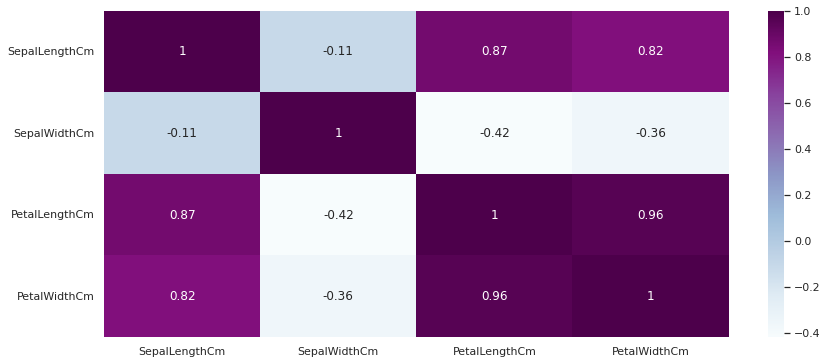

In [ ]:
sns.heatmap(vd.corr(), annot=True, cmap="BuPu")

In [ ]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = vd.loc[:, features].values   #defining the feature matrix
y = vd.Species

In [ ]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

# **Defining the decision tree classifier and fitting the training set**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

**Prediction on test data**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

**Score**

In [ ]:
score=model.score(X_test,y_test)
score

0.96

**Confusion Matrix**

In [ ]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test,cmap='BuPu',colorbar=True)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

Accuracy: 96.0%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


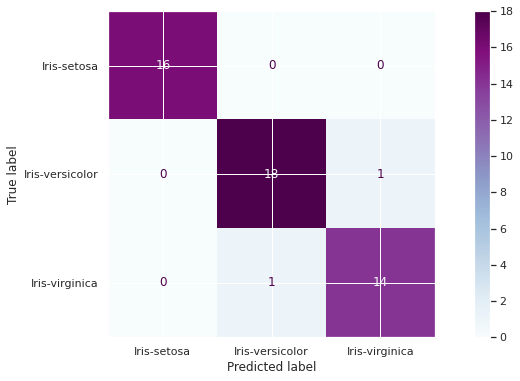

In [ ]:

print('Decision Tree Classifier')
report(model)
print(f'Accuracy: {round(score*100,2)}%')
     

# **Visualizing the decision tree**

[Text(0.4444444444444444, 0.9166666666666666, 'petal length(cm) <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.5555555555555556, 0.75, 'petal width(cm) <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(0.3333333333333333, 0.5833333333333334, 'petal length(cm) <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(0.2222222222222222, 0.4166666666666667, 'petal width(cm) <= 1.65\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = Iris-versicolor'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Iris-versicolor'),
 Text(0.3333333333333333, 0.25, 'petal length(cm) <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0,

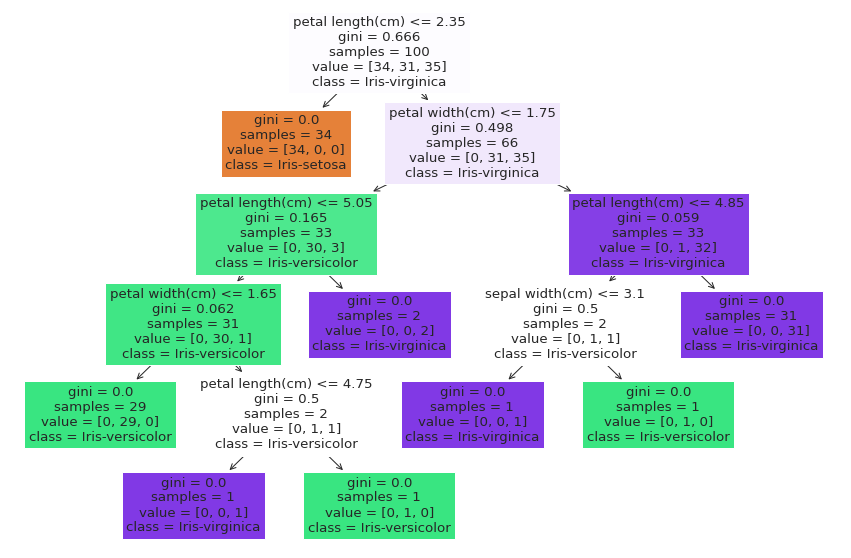

In [ ]:
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= vd.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled = True, feature_names = feature_name, class_names= class_name)